## Advanced Pandas, Basic Python Viz and Exercise

### Exercise
1. Use the same dataframes you generated or copied to this directory from the 03 Exercise:
    1. Extract of any SQL database 
    1. Imported file from your capstone work
    1. Any other data from other exercises you have aleady used
1. Import into Pandas
1. Generate at least three additional dataframes with analytics introduced in this notebook
    1. Melt
    1. Pivot
    1. Quantile
    1. Aggregations
1. Build at least three  visualizations supported by Pandas directly using prior analytics from the 03 Exercise or new analytics from this exercise

In [33]:
#Install Python library to read/write Excel 2010 xlsx/xlsm/xltx/xltm files
%pip install openpyxl
import pandas as pd

In [69]:
#ATTENTION: I am following verbatim along with this online tutorial https://realpython.com/pandas-plot-python/ 
download_url = (
    "https://raw.githubusercontent.com/fivethirtyeight/"
    "data/master/college-majors/recent-grads.csv"
)
df = pd.read_csv(download_url)

In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [37]:
#Configure the display.max.columns option to make sure pandas doesn’t hide any columns
pd.set_option("display.max.columns", None)
#View the first 3 rows of data with .head()
df.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0


In [43]:
#Create a Pandas Plot
#Set up display plots with the %matplotlib inline
#%matplotlib inline enables inline plotting, where the plots/graphs will be displayed just below the cell
%matplotlib inline
#Use the pyplot interface from matplotlib to display the plot
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:xlabel='Rank'>

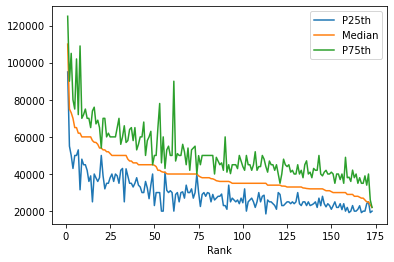

In [42]:
#Median plot
#The x-axis value is the rank determined by the median income for all degrees/majors
#The y-axis values are the "P25th", "Median", and "P75th"
df.plot.line(x="Rank", y=["P25th", "Median", "P75th"])

<AxesSubplot:ylabel='Frequency'>

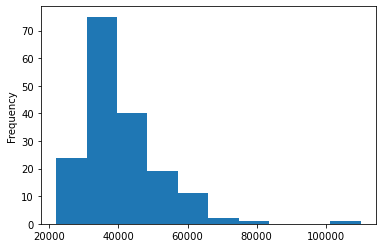

In [54]:
#Distribution and Histogram Plots
#Use the "Median" column of the DataFrame you created from the college major data
median_column = df["Median"]
type(median_column)
#Create a histogram for the "Median" column using default; no bins
median_column.plot.hist()

<AxesSubplot:xlabel='Major'>

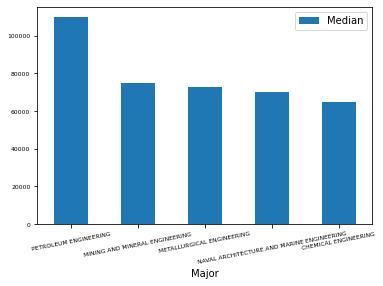

In [68]:
#Outliers
#Notice the outlier to the right of the distribution
#Let's dig deeper: 
#      1. Which Top 5 majors does this outlier represent?  
#      2. How big is its edge?
#Create a new DataFrame called top_5
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5.plot(x="Major", y="Median", kind="bar", rot=11, fontsize=6)
#Use rot and fontsize parameters to rotate and size the labels of the x-axis so that they’re visible.
#
#Answer to the questions
#The plot shows that the median salary of petroleum engineering majors is more than $20,000 higher than the rest. 
#The earnings for the second- through fourth-place majors are relatively close to one another.
#Petroleum engineering majors were by far the best paid recent graduates.

<AxesSubplot:xlabel='Major'>

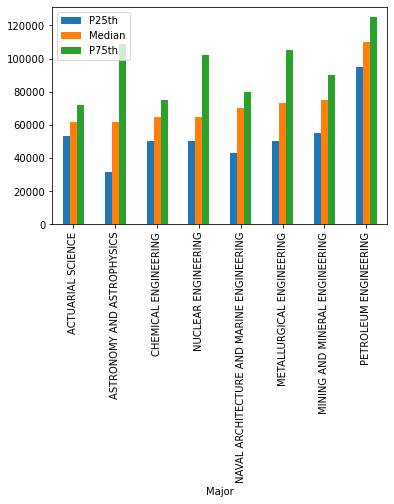

In [72]:
#Let’s investigate all majors whose median salary is above $60,000. 
#First, you need to filter these majors with the mask df[df["Median"] > 60000]. 
#Then you can create another bar plot showing all three earnings columns
top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot.bar(x="Major", y=["P25th", "Median", "P75th"])
#This confirms above: petroleum engineering majors were by far the best paid recent graduates.

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

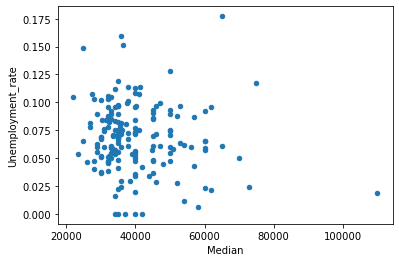

In [74]:
#Scatter Plot
df.plot.scatter(x="Median", y="Unemployment_rate")
#There doesn't appear to be a significant correlation between the earnings and unemployment rate

<AxesSubplot:ylabel='Major_category'>

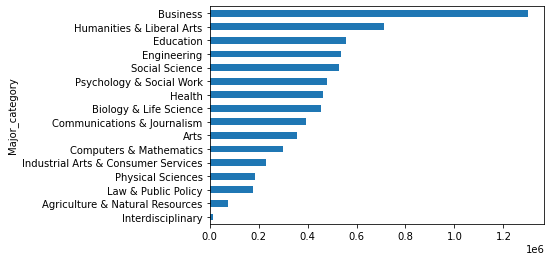

In [78]:
#Grouping and Aggregation
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals
cat_totals.plot(kind="barh", fontsize=10)

<AxesSubplot:ylabel='Frequency'>

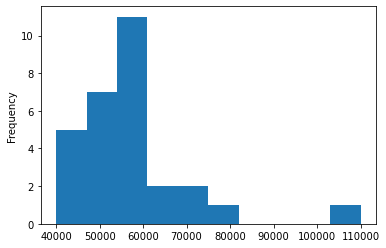

In [80]:
#The range of the major median earnings is somewhat smaller, starting at $40,000. 
#The distribution is closer to normal, although its peak is still on the left.
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")